# Lab 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') # Look Pretty

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def plotDecisionBoundary(model, X, y):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  padding = 0.6
  resolution = 0.0025
  colors = ['royalblue','forestgreen','ghostwhite']

  # Calculate the boundaris
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding

  # Create a 2D Grid Matrix. The values stored in the matrix
  # are the predictions of the class at at said location
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour map
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

  # Plot the test original points as well...
  for label in range(len(np.unique(y))):
    indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

  p = model.get_params()
  plt.axis('tight')
  plt.title('K = ' + str(p['n_neighbors']))

In [52]:
# 
# TODO: Load up the dataset into a variable called X. Check the .head and
# compare it to the file you loaded in a text editor. Make sure you're
# loading your data properly--don't fail on the 1st step!
#
# .. your code here ..
x = pd.read_csv('Datasets/wheat.data')

In [53]:
print(x.head())

   id   area  perimeter  compactness  length  width  asymmetry  groove  \
0   0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220   
1   1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956   
2   2  14.29      14.09       0.9050   5.291  3.337      2.699   4.825   
3   3  13.84      13.94       0.8955   5.324  3.379      2.259   4.805   
4   4  16.14      14.99       0.9034   5.658  3.562      1.355   5.175   

  wheat_type  
0       kama  
1       kama  
2       kama  
3       kama  
4       kama  


In [54]:
#
# TODO: Copy the 'wheat_type' series slice out of X, and into a series
# called 'y'. Then drop the original 'wheat_type' column from the X
#
# .. your code here ..
y = x['wheat_type']
x = x.drop('wheat_type', 1)
print('x')
print(x.head())
print(x.describe())
print('y')
print(y.head())
print(y.describe())

x
   id   area  perimeter  compactness  length  width  asymmetry  groove
0   0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220
1   1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956
2   2  14.29      14.09       0.9050   5.291  3.337      2.699   4.825
3   3  13.84      13.94       0.8955   5.324  3.379      2.259   4.805
4   4  16.14      14.99       0.9034   5.658  3.562      1.355   5.175
               id        area   perimeter  compactness      length  \
count  210.000000  210.000000  210.000000   207.000000  210.000000   
mean   104.500000   14.847524   14.559286     0.871280    5.563918   
std     60.765944    2.909699    1.305959     0.023306    0.719594   
min      0.000000   10.590000   12.410000     0.808100    0.818900   
25%     52.250000   12.270000   13.450000     0.857700    5.244750   
50%    104.500000   14.355000   14.320000     0.873500    5.518000   
75%    156.750000   17.305000   15.715000     0.887650    5.979750   
max    209.0

In [31]:
# TODO: Do a quick, "ordinal" conversion of 'y'. In actuality our
# classification isn't ordinal, but just as an experiment...
#
# .. your code here ..
#y = y.astype('category', ordered=True)
y = y.apply({'kama':1, 'canadian':2, 'rosa':3}.get)
print(y)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      2
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
180    2
181    2
182    2
183    2
184    2
185    2
186    2
187    2
188    2
189    2
190    2
191    2
192    2
193    2
194    2
195    2
196    2
197    2
198    2
199    2
200    2
201    2
202    2
203    2
204    2
205    2
206    2
207    2
208    2
209    2
Name: wheat_type, dtype: category
Categories (3, int64): [2 < 1 < 3]


In [55]:
#
# TODO: Basic nan munging. Fill each row's nans with the mean of the feature
#
# .. your code here ..
for column in x.columns:
    print(x[column].mean())
    x[column] = x[column].fillna(x[column].mean())
print(x.describe())

104.5
14.8475238095
14.5592857143
0.871279710145
5.56391809524
3.28144019139
3.69352952381
5.40752912621
               id        area   perimeter  compactness      length  \
count  210.000000  210.000000  210.000000   210.000000  210.000000   
mean   104.500000   14.847524   14.559286     0.871280    5.563918   
std     60.765944    2.909699    1.305959     0.023138    0.719594   
min      0.000000   10.590000   12.410000     0.808100    0.818900   
25%     52.250000   12.270000   13.450000     0.857925    5.244750   
50%    104.500000   14.355000   14.320000     0.873100    5.518000   
75%    156.750000   17.305000   15.715000     0.887325    5.979750   
max    209.000000   21.180000   17.250000     0.918300    6.675000   

            width   asymmetry      groove  
count  210.000000  210.000000  210.000000  
mean     3.281440    3.693530    5.407529  
std      0.418901    1.495112    0.527211  
min      2.630000    0.765100    3.485000  
25%      2.957000    2.600250    5.045250  


In [33]:
#
# TODO: Split X into training and testing data sets using train_test_split().
# INFO: Use 0.33 test size, and use random_state=1. This is important
# so that your answers are verifiable. In the real world, you wouldn't
# specify a random_state.
#
# .. your code here ..
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [34]:
# 
# TODO: Create an instance of SKLearn's Normalizer class and then train it
# using its .fit() method against your *training* data.
#
# NOTE: The reason you only fit against your training data is because in a
# real-world situation, you'll only have your training data to train with!
# In this lab setting, you have both train+test data; but in the wild,
# you'll only have your training data, and then unlabeled data you want to
# apply your models to.
#
# .. your code here ..
import sklearn as sk
normalizer = sk.preprocessing.Normalizer().fit(data_train)


In [35]:
#
# TODO: With your trained pre-processor, transform both your training AND
# testing data.
#
# NOTE: Any testing data has to be transformed with your preprocessor
# that has ben fit against your training data, so that it exist in the same
# feature-space as the original data used to train your models.
#
# .. your code here ..
xTrainN = normalizer.transform(data_train)
xTestN = normalizer.transform(data_test)

In [45]:
#
# TODO: Just like your preprocessing transformation, create a PCA
# transformation as well. Fit it against your training data, and then
# project your training and testing features into PCA space using the
# PCA model's .transform() method.
#
# NOTE: This has to be done because the only way to visualize the decision
# boundary in 2D would be if your KNN algo ran in 2D as well:
#
# .. your code here ..
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca.fit(xTrainN)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
xTrainNP = pca.transform(xTrainN)
xTestNP = pca.transform(xTestN)

In [47]:
#
# TODO: Create and train a KNeighborsClassifier. Start with K=9 neighbors.
# NOTE: Be sure train your classifier against the pre-processed, PCA-
# transformed training data above! You do not, of course, need to transform
# your labels.
#
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(xTrainNP, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [48]:
# HINT: Ensure your KNeighbors classifier object from earlier is called 'knn'
plotDecisionBoundary(knn, xTrainNP, label_train)

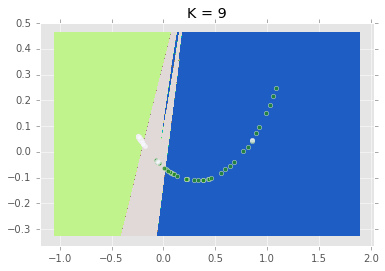

In [49]:
plt.show()

In [50]:
#------------------------------------
#
# TODO: Display the accuracy score of your test data/labels, computed by
# your KNeighbors model.
#
# NOTE: You do NOT have to run .predict before calling .score, since
# .score will take care of running your predictions for you automatically.
#
# .. your code here ..
score = knn.score(xTrainNP, label_train)
print(score)
print(knn.predict(xTrainNP))

0.928571428571
[2 3 3 1 1 1 2 2 1 2 3 2 1 3 3 2 3 2 3 1 3 3 3 2 2 3 2 2 1 2 3 2 2 1 3 3 1
 2 2 2 3 2 2 3 2 3 1 3 2 1 3 3 2 1 2 3 1 2 3 3 3 1 3 3 2 3 2 1 1 3 3 2 3 3
 1 3 1 2 3 2 3 3 2 3 1 1 2 3 3 1 1 3 1 1 1 2 1 2 3 2 1 3 3 2 1 3 3 1 3 1 3
 3 1 2 2 3 3 3 1 2 2 2 3 2 3 1 2 1 3 3 3 2 2 3 3 2 3 3 2 1]


In [ ]:
#
# BONUS: Instead of the ordinal conversion, try and get this assignment
# working with a proper Pandas get_dummies for feature encoding. HINT:
# You might have to update some of the plotDecisionBoundary code.


plt.show()

In [51]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrainNP, label_train)
    score = knn.score(xTrainNP, label_train)
    print('\n %d score: ' % i)
    print(score)


 1 score: 
1.0

 2 score: 
0.95

 3 score: 
0.935714285714

 4 score: 
0.942857142857

 5 score: 
0.921428571429

 6 score: 
0.928571428571

 7 score: 
0.928571428571

 8 score: 
0.928571428571

 9 score: 
0.928571428571
